<a href="https://colab.research.google.com/github/duskvirkus/colab-notebooks/blob/main/Network_Blending_sg2_ada_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Blending

Notebook by @duskvirkus (https://github.com/duskvirkus/)

Thanks to Derrick (https://twitter.com/dvsch) and Justin (https://twitter.com/Buntworthy)

## Setup

In [21]:
!nvidia-smi -L

GPU 0: A100-SXM4-40GB (UUID: GPU-43fabb22-891e-e57c-1a5c-b92557b54fff)


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

drive_path = '/content/drive/MyDrive/'
repo_container_dir = 'sg2-network-blend'
repo_name = 'stylegan2-ada-pytorch'
git_repo = 'https://github.com/dvschultz/stylegan2-ada-pytorch'
branch_name = 'main'
git_commit_id = None

working_dir = os.path.join(drive_path, 'colab', repo_container_dir, repo_name)

if os.path.isdir(working_dir):
  %cd {working_dir}
else:
  container_path = os.path.join(drive_path, 'colab', repo_container_dir)
  os.makedirs(container_path)
  %cd {container_path}
  !git clone --branch {branch_name} {git_repo}
  %cd {repo_name}
  if git_commit_id is not None:
    !git checkout {git_commit_id}

/content/drive/MyDrive/colab/sg2-network-blend
Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 533, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 533 (delta 2), reused 0 (delta 0), pack-reused 524
Receiving objects: 100% (533/533), 8.42 MiB | 20.18 MiB/s, done.
Resolving deltas: 100% (303/303), done.
/content/drive/MyDrive/colab/sg2-network-blend/stylegan2-ada-pytorch


In [ ]:
!pip install ninja opensimplex torch==1.7.1 torchvision==0.8.2

In [ ]:
# if not A100
!pip install torch==1.7.1 torchvision==0.8.2 # if not A100

In [12]:
# if A100
!pip install torch==1.7.1+cu110 -f https://download.pytorch.org/whl/torch/
!pip install torchvision==0.8.2+cu110 -f https://download.pytorch.org/whl/torchvision/

Looking in links: https://download.pytorch.org/whl/torch/
tcmalloc: large alloc 1156751360 bytes == 0x55845038e000 @  0x7f1d6de211e7 0x55844d56d518 0x55844d537d17 0x55844d6b71f5 0x55844d6518f8 0x55844d53b5d2 0x55844d61a97e 0x55844d53b229 0x55844d62db3d 0x55844d5af458 0x55844d53c9da 0x55844d5ab108 0x55844d53c9da 0x55844d5ab108 0x55844d5aa1c0 0x55844d53d36c 0x55844d53d571 0x55844d5ac633 0x55844d5aa02f 0x55844d53d36c 0x55844d53d571 0x55844d5ac633 0x55844d5aa02f 0x55844d53d36c 0x55844d53d571 0x55844d5ac633 0x55844d5aa1c0 0x55844d53d36c 0x55844d53d571 0x55844d5ac633 0x55844d5aa02f
tcmalloc: large alloc 1445945344 bytes == 0x5584952b8000 @  0x7f1d6de22615 0x55844d5383bc 0x55844d61918a 0x55844d53b1cd 0x55844d62db3d 0x55844d5af458 0x55844d5aa02f 0x55844d53caba 0x55844d5ab108 0x55844d5aa02f 0x55844d53caba 0x55844d5ab108 0x55844d5aa02f 0x55844d53caba 0x55844d5ab108 0x55844d5aa02f 0x55844d53caba 0x55844d5ab108 0x55844d5aa02f 0x55844d53caba 0x55844d5ab108 0x55844d53c9da 0x55844d5ab108 0x55844d5aa0

## Blend networks

In [40]:
def gen_temp(pkl):
  os.makedirs('/content/temp', exist_ok=True)
  !python generate.py --outdir=/content/temp --trunc=0.8 --seeds=0-8 --network={pkl}

In [39]:
from IPython.display import Image
import pathlib

from pathlib import Path 
import matplotlib.pyplot as plt

def show_temp():
  dir = pathlib.Path("/content/temp/")
  images = list(dir.glob('*.png'))

  plt.figure(figsize=(12,12))

  for i, img_path in enumerate(images):
    img_path = str(img_path)
    plt.subplot(3,3,i+1)    
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(Path(img_path).name)
    plt.axis("off")

  plt.show()
  plt.close()

In [33]:
def blend(lower, higher, split):
  !python blend_models.py --lower_res_pkl {lower} --higher_res_pkl {higher} --split_res {split} --output_path '/content/out.pkl'

In [51]:
# you'll need your own pkls here you can find some at https://github.com/justinpinkney/awesome-pretrained-stylegan2

small_world = '/content/drive/MyDrive/colab-old/colab-sg2-ada-pytorch-jan-22/stylegan2-ada-pytorch/results/00004-small-world-v1-mirror-mirrory-11gb-gpu-gamma50-bg-resumecustom/network-snapshot-001524.pkl'
shadow_figures = '/content/drive/MyDrive/models/stylegan2-ada-pytorch/shadow-figures/v1-cp3/shadow-figures-v1-cp3-torch.pkl'
tree_flowers = '/content/drive/MyDrive/models/stylegan2-ada-pytorch/tree-flowers/v1-cp1/tree-flowers-v1-cp1.pkl'
skin_people = '/content/drive/MyDrive/models/stylegan2-ada-pytorch/skin-people/v1-cp2/skin-people-v1-cp2.pkl'
met_faces = '/content/drive/MyDrive/models/stylegan2-ada-pytorch/not-mine/metfaces2-ak/network-snapshot-metfaces2.pkl' # credit @ak92501
frea_gan = '/content/drive/MyDrive/models/stylegan2-ada-pytorch/not-mine/FreaGAN-Derrick/FreaGAN.pkl' # credit @dvsch

Loading networks from "/content/drive/MyDrive/colab-old/colab-sg2-ada-pytorch-jan-22/stylegan2-ada-pytorch/results/00004-small-world-v1-mirror-mirrory-11gb-gpu-gamma50-bg-resumecustom/network-snapshot-001524.pkl"...
Generating image for seed 0 (0/9) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 1 (1/9) ...
Generating image for seed 2 (2/9) ...
Generating image for seed 3 (3/9) ...
Generating image for seed 4 (4/9) ...
Generating image for seed 5 (5/9) ...
Generating image for seed 6 (6/9) ...
Generating image for seed 7 (7/9) ...
Generating image for seed 8 (8/9) ...


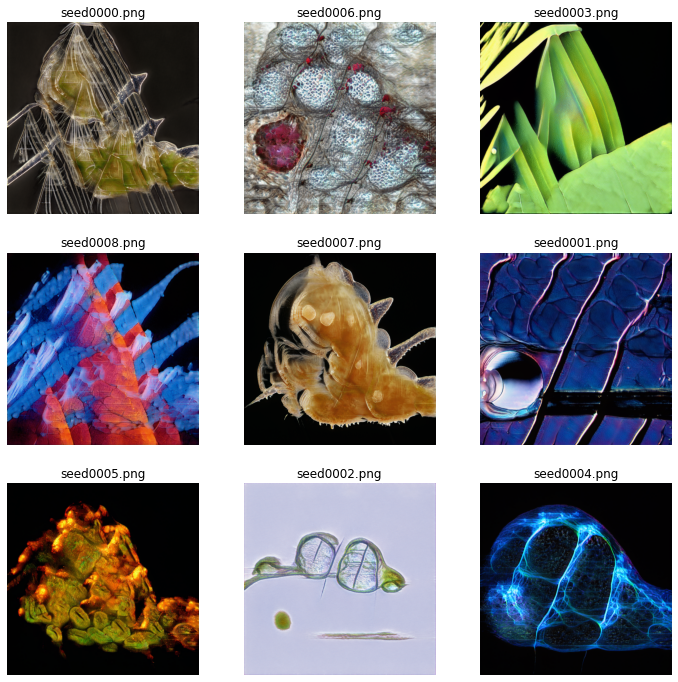

In [41]:
gen_temp(small_world)
show_temp()

Loading networks from "/content/drive/MyDrive/models/stylegan2-ada-pytorch/shadow-figures/v1-cp3/shadow-figures-v1-cp3-torch.pkl"...
Generating image for seed 0 (0/9) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 1 (1/9) ...
Generating image for seed 2 (2/9) ...
Generating image for seed 3 (3/9) ...
Generating image for seed 4 (4/9) ...
Generating image for seed 5 (5/9) ...
Generating image for seed 6 (6/9) ...
Generating image for seed 7 (7/9) ...
Generating image for seed 8 (8/9) ...


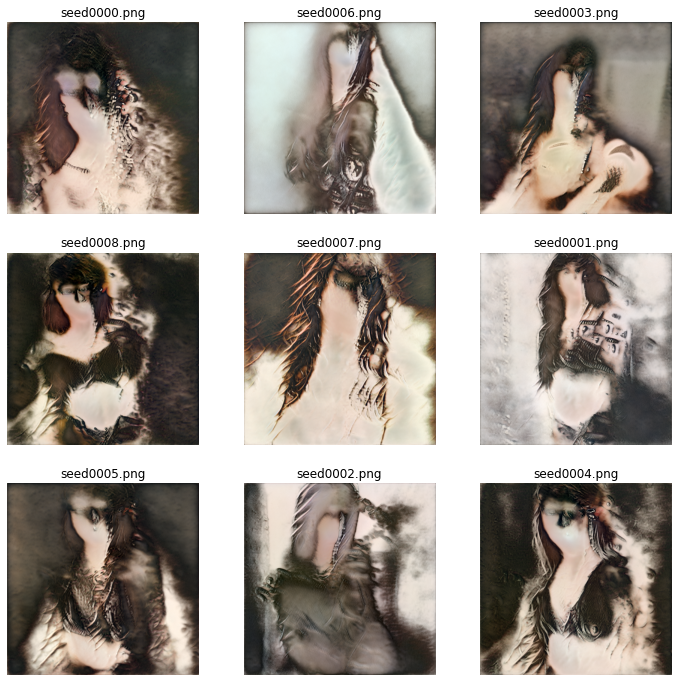

In [42]:
gen_temp(shadow_figures)
show_temp()

Loading networks from "/content/drive/MyDrive/models/stylegan2-ada-pytorch/skin-people/v1-cp2/skin-people-v1-cp2.pkl"...
Generating image for seed 0 (0/9) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 1 (1/9) ...
Generating image for seed 2 (2/9) ...
Generating image for seed 3 (3/9) ...
Generating image for seed 4 (4/9) ...
Generating image for seed 5 (5/9) ...
Generating image for seed 6 (6/9) ...
Generating image for seed 7 (7/9) ...
Generating image for seed 8 (8/9) ...


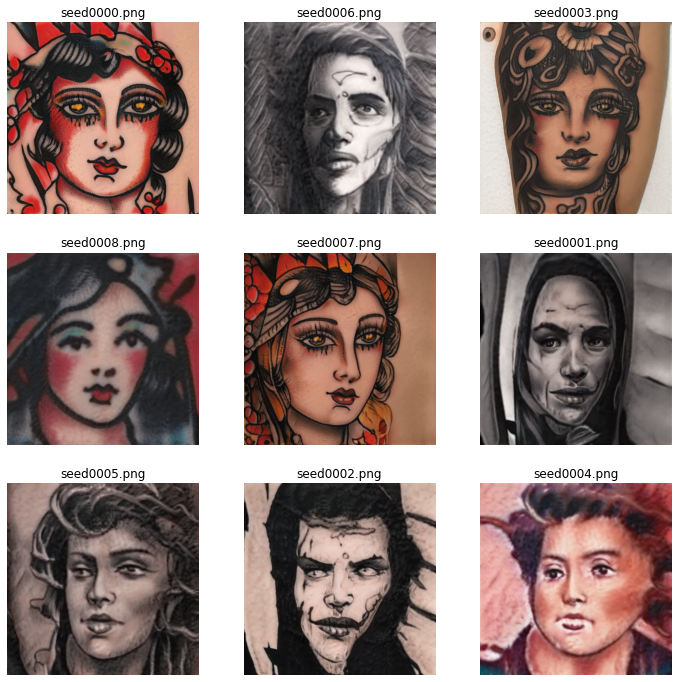

In [52]:
gen_temp(skin_people)
show_temp()

Loading networks from "/content/drive/MyDrive/models/stylegan2-ada-pytorch/tree-flowers/v1-cp1/tree-flowers-v1-cp1.pkl"...
Generating image for seed 0 (0/9) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 1 (1/9) ...
Generating image for seed 2 (2/9) ...
Generating image for seed 3 (3/9) ...
Generating image for seed 4 (4/9) ...
Generating image for seed 5 (5/9) ...
Generating image for seed 6 (6/9) ...
Generating image for seed 7 (7/9) ...
Generating image for seed 8 (8/9) ...


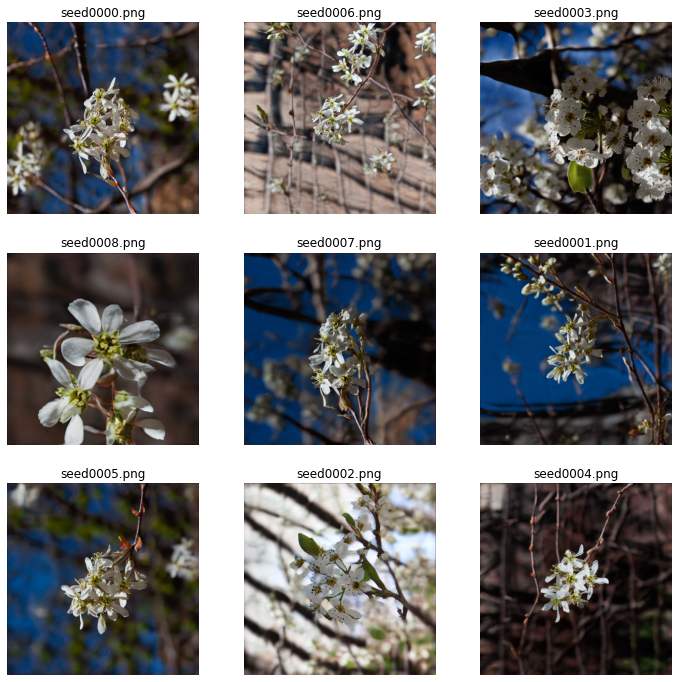

In [50]:
gen_temp(tree_flowers)
show_temp()

Loading networks from "/content/drive/MyDrive/models/stylegan2-ada-pytorch/not-mine/metfaces2-ak/network-snapshot-metfaces2.pkl"...
Generating image for seed 0 (0/9) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 1 (1/9) ...
Generating image for seed 2 (2/9) ...
Generating image for seed 3 (3/9) ...
Generating image for seed 4 (4/9) ...
Generating image for seed 5 (5/9) ...
Generating image for seed 6 (6/9) ...
Generating image for seed 7 (7/9) ...
Generating image for seed 8 (8/9) ...


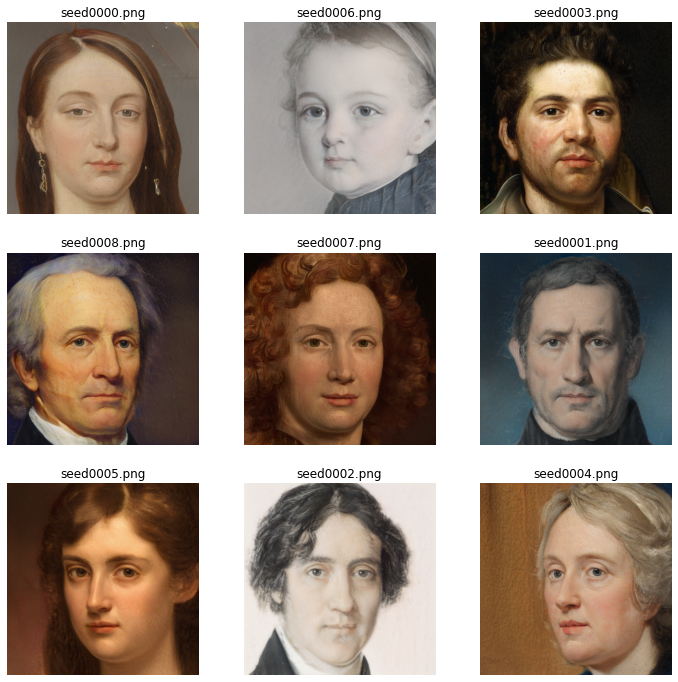

In [43]:
gen_temp(met_faces)
show_temp()

Loading networks from "/content/drive/MyDrive/models/stylegan2-ada-pytorch/not-mine/FreaGAN-Derrick/FreaGAN.pkl"...
Generating image for seed 0 (0/9) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 1 (1/9) ...
Generating image for seed 2 (2/9) ...
Generating image for seed 3 (3/9) ...
Generating image for seed 4 (4/9) ...
Generating image for seed 5 (5/9) ...
Generating image for seed 6 (6/9) ...
Generating image for seed 7 (7/9) ...
Generating image for seed 8 (8/9) ...


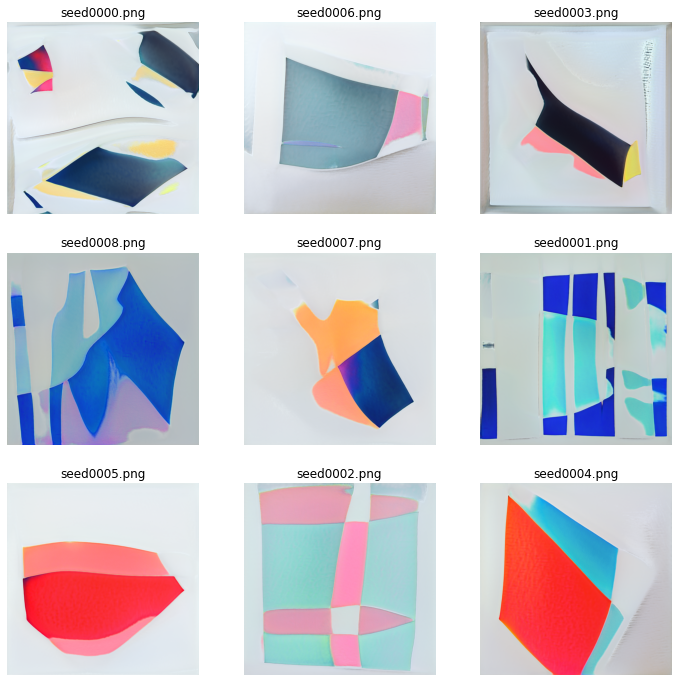

In [44]:
gen_temp(frea_gan)
show_temp()

Loading networks from "/content/out.pkl"...
Generating image for seed 0 (0/9) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 1 (1/9) ...
Generating image for seed 2 (2/9) ...
Generating image for seed 3 (3/9) ...
Generating image for seed 4 (4/9) ...
Generating image for seed 5 (5/9) ...
Generating image for seed 6 (6/9) ...
Generating image for seed 7 (7/9) ...
Generating image for seed 8 (8/9) ...


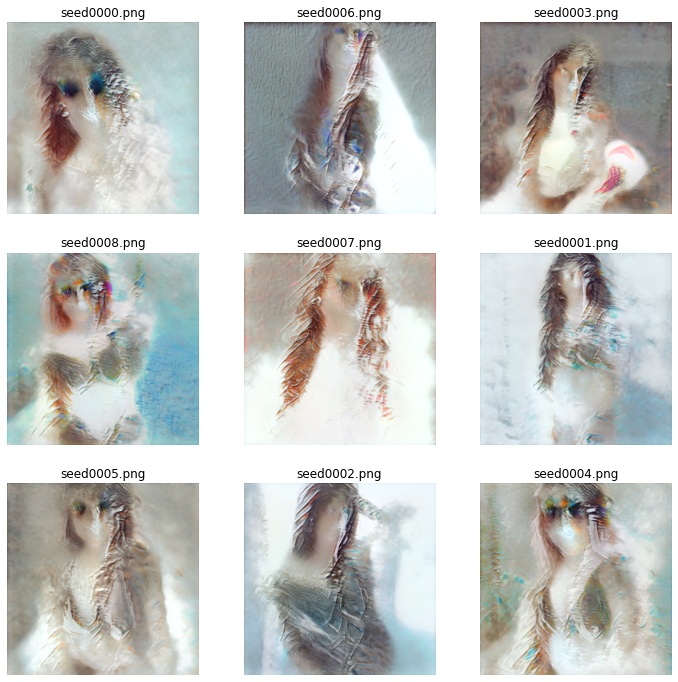

In [72]:
blend(shadow_figures, frea_gan, 128)
gen_temp('/content/out.pkl')
show_temp()